In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Import* Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Load* the data

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/NLP/Next Word Prediction/twitter_training.csv",header= None)

In [3]:
dataset

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
dataset[2].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: 2, dtype: int64

In [5]:
tweets = dataset.iloc[:,3:4]

In [6]:
tweets

,3
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [7]:
tweets.columns = ["Tweets"]

In [8]:
tweets

,Tweets
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [9]:
tweets = tweets.iloc[:5000,:]

In [10]:
tweets

,Tweets
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
4995,@OregonChai did finally stop making the sugar ...
4996,@OregonChai What did y ’ all really stop makin...
4997,@OregonChai did y’all stop making the butter<u...
4998,Amazon UK launches the Sherlock Holmes Advent ...


Text preprocessing

In [11]:
re_special_char = "[^a-z\s]"

In [12]:
import re

In [13]:
def text_preprocessing(review):
    review = str(review)
    #Normalizing the case
    review = review.lower()
    #Removal of special characters
    review = re.sub(re_special_char,"", review)
    return review

In [14]:
tweets["Tweets"]  = tweets["Tweets"].apply(text_preprocessing)

<ipython-input-14-baa078caa546>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["Tweets"]  = tweets["Tweets"].apply(text_preprocessing)


In [15]:
tweets

,Tweets
0,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...
4,im getting on borderlands and i will murder y...
...,...
4995,oregonchai did finally stop making the sugar p...
4996,oregonchai what did y all really stop making ...
4997,oregonchai did yall stop making the butterunk ...
4998,amazon uk launches the sherlock holmes advent ...


Tokenization

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tk = Tokenizer()

In [19]:
tk.fit_on_texts(tweets["Tweets"])

In [20]:
tk.word_index

{'the': 1,
 'i': 2,
 'to': 3,
 'and': 4,
 'borderlands': 5,
 'a': 6,
 'is': 7,
 'of': 8,
 'this': 9,
 'it': 10,
 'for': 11,
 'in': 12,
 'on': 13,
 'my': 14,
 'so': 15,
 'you': 16,
 'that': 17,
 'with': 18,
 'game': 19,
 'be': 20,
 'just': 21,
 'black': 22,
 'was': 23,
 'war': 24,
 'ops': 25,
 'im': 26,
 'cold': 27,
 'have': 28,
 'but': 29,
 'all': 30,
 'are': 31,
 'its': 32,
 'not': 33,
 'like': 34,
 'me': 35,
 'love': 36,
 'really': 37,
 'good': 38,
 'play': 39,
 'at': 40,
 'out': 41,
 'if': 42,
 'new': 43,
 'we': 44,
 'one': 45,
 'as': 46,
 'from': 47,
 'about': 48,
 'amazon': 49,
 'get': 50,
 'now': 51,
 'do': 52,
 'more': 53,
 'shit': 54,
 'cant': 55,
 'up': 56,
 'your': 57,
 'has': 58,
 'time': 59,
 'some': 60,
 'what': 61,
 'italy': 62,
 'games': 63,
 'see': 64,
 'fun': 65,
 'how': 66,
 'can': 67,
 'video': 68,
 'best': 69,
 'why': 70,
 'been': 71,
 'again': 72,
 'will': 73,
 'am': 74,
 'dont': 75,
 'still': 76,
 'playing': 77,
 'no': 78,
 'excited': 79,
 'fucking': 80,
 'when': 

In [21]:
len(tk.word_index)

5788

In [22]:
tk.index_word[1]

'the'

In [23]:
def gen_sequences(data):
    input_seq = []
    for each_tweet in data:
        token_list = tk.texts_to_sequences([each_tweet])
        token_list = token_list[0]
        for i in range(1, len(token_list)-1):
            input_seq.append(token_list[0:i + 2])
    return input_seq

In [24]:
input_sequences = gen_sequences(tweets["Tweets"])

In [25]:
input_sequences

[[26, 168, 13],
 [26, 168, 13, 5],
 [26, 168, 13, 5, 4],
 [26, 168, 13, 5, 4, 2],
 [26, 168, 13, 5, 4, 2, 73],
 [26, 168, 13, 5, 4, 2, 73, 702],
 [26, 168, 13, 5, 4, 2, 73, 702, 16],
 [26, 168, 13, 5, 4, 2, 73, 702, 16, 30],
 [2, 74, 235],
 [2, 74, 235, 3],
 [2, 74, 235, 3, 1],
 [2, 74, 235, 3, 1, 1425],
 [2, 74, 235, 3, 1, 1425, 4],
 [2, 74, 235, 3, 1, 1425, 4, 2],
 [2, 74, 235, 3, 1, 1425, 4, 2, 73],
 [2, 74, 235, 3, 1, 1425, 4, 2, 73, 539],
 [2, 74, 235, 3, 1, 1425, 4, 2, 73, 539, 16],
 [2, 74, 235, 3, 1, 1425, 4, 2, 73, 539, 16, 30],
 [26, 168, 13],
 [26, 168, 13, 5],
 [26, 168, 13, 5, 4],
 [26, 168, 13, 5, 4, 2],
 [26, 168, 13, 5, 4, 2, 73],
 [26, 168, 13, 5, 4, 2, 73, 539],
 [26, 168, 13, 5, 4, 2, 73, 539, 16],
 [26, 168, 13, 5, 4, 2, 73, 539, 16, 30],
 [26, 235, 13],
 [26, 235, 13, 5],
 [26, 235, 13, 5, 4],
 [26, 235, 13, 5, 4, 2],
 [26, 235, 13, 5, 4, 2, 73],
 [26, 235, 13, 5, 4, 2, 73, 702],
 [26, 235, 13, 5, 4, 2, 73, 702, 16],
 [26, 235, 13, 5, 4, 2, 73, 702, 16, 30],
 [26, 

In [26]:
max_seq_len = max([len(seq) for seq in input_sequences])

In [27]:
max_seq_len

99

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
input_sequences  = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

In [30]:
input_sequences

array([[   0,    0,    0, ...,   26,  168,   13],
       [   0,    0,    0, ...,  168,   13,    5],
       [   0,    0,    0, ...,   13,    5,    4],
       ...,
       [   0,    0,    0, ...,  167,  228,  268],
       [   0,    0,    0, ...,  228,  268,  406],
       [   0,    0,    0, ...,  268,  406, 5788]], dtype=int32)

In [31]:
input_sequences.shape

(77400, 99)

In [32]:
X = input_sequences[:,:-1]

In [33]:
X

array([[  0,   0,   0, ...,   0,  26, 168],
       [  0,   0,   0, ...,  26, 168,  13],
       [  0,   0,   0, ..., 168,  13,   5],
       ...,
       [  0,   0,   0, ..., 168, 167, 228],
       [  0,   0,   0, ..., 167, 228, 268],
       [  0,   0,   0, ..., 228, 268, 406]], dtype=int32)

In [34]:
X.shape

(77400, 98)

In [35]:
y = input_sequences[:,-1]

In [36]:
y

array([  13,    5,    4, ...,  268,  406, 5788], dtype=int32)

In [37]:
y.shape

(77400,)

In [38]:
vocab_size = len(tk.word_index)

In [39]:
vocab_size

5788

In [40]:
embedding_vector = {}

In [41]:
import tqdm

In [42]:
data = open("/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/NLP/Next Word prediction-partices/glove.6B.300d.txt", mode = "r", encoding = "utf8")
for each_line in tqdm.tqdm(data):
    value = each_line.split()
    word = value[0]
    emb_vec = np.array(value[1:], dtype = "float32")
    embedding_vector[word] = emb_vec

400000it [00:26, 15061.98it/s]


In [43]:
len(embedding_vector)

400000

In [44]:
vocab_size

5788

In [45]:
embedding_matrix = np.zeros((vocab_size + 1, 300))

In [46]:
embedding_matrix.shape

(5789, 300)

In [47]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
for word, position in tk.word_index.items():
    value = embedding_vector.get(word)
    if value is not None:
        embedding_matrix[position] = value
    else :
        embedding_matrix[position] = np.random.rand(300)


In [49]:
embedding_matrix.shape

(5789, 300)

In [50]:
##Build the NN Architecture

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout

In [53]:
# intially the model
model = Sequential()

In [54]:
### Add Embedding layer

In [55]:
X.shape[1]

98

In [56]:
em_layer = Embedding(vocab_size + 1, 300,weights = [embedding_matrix],input_length = X.shape[1],trainable = False)

In [57]:
model.add(em_layer)

In [58]:
#Add LSTM-1 Layer

In [59]:
#return_sequences -- True when we want to add another LSTM Layer after this
#return_sequences -- False -- When we are adding a Dense layer after LSTM
lstm_layer_1 = LSTM(kernel_initializer = "random_uniform" , return_sequences=True, units = 160 )

In [60]:
model.add(lstm_layer_1)

In [61]:
model.add(Dropout(0.05))

In [62]:
###Add LSTM-2 Layer

In [63]:
lstm_layer_2 = LSTM(kernel_initializer = "random_uniform" , return_sequences=True, units = 130 )

In [64]:
model.add(lstm_layer_2)

In [65]:
model.add(Dropout(0.05))

In [66]:
###Add LSTM-3 Layer

In [67]:
lstm_layer_3 = LSTM(kernel_initializer = "random_uniform" , return_sequences=False, units = 80)

In [68]:
model.add(lstm_layer_3)

In [69]:
model.add(Dropout(0.05))

In [70]:
# Add output layer

In [71]:
output_layer = Dense(kernel_initializer = "random_uniform", activation="softmax", units = vocab_size+1)

In [72]:
model.add(output_layer)

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 98, 300)           1736700   
                                                                 
 lstm (LSTM)                 (None, 98, 160)           295040    
                                                                 
 dropout (Dropout)           (None, 98, 160)           0         
                                                                 
 lstm_1 (LSTM)               (None, 98, 130)           151320    
                                                                 
 dropout_1 (Dropout)         (None, 98, 130)           0         
                                                                 
 lstm_2 (LSTM)               (None, 80)                67520     
                                                                 
 dropout_2 (Dropout)         (None, 80)                0

In [74]:
from tensorflow.keras.utils import plot_model

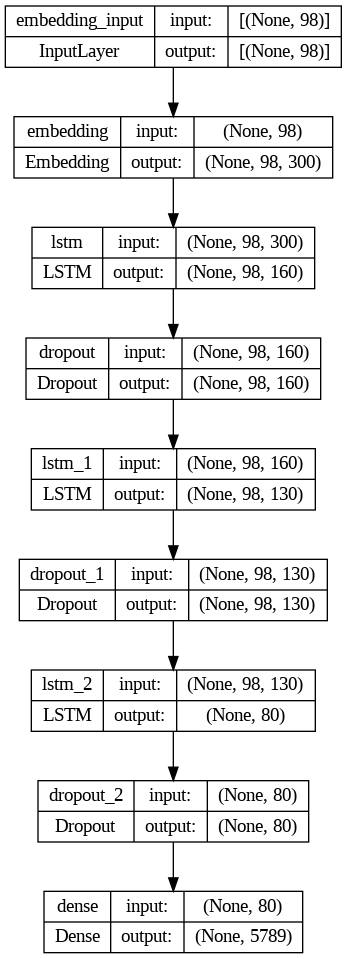

In [75]:
plot_model(model,show_shapes = True)

In [76]:
model.compile(loss="sparse_categorical_crossentropy",optimizer= "adam", metrics = ["accuracy"])

In [77]:
model.fit(X,y, epochs=25, batch_size=32)

Epoch 1/25
2419/2419 [==============================] - 707s 290ms/step - loss: 6.8240 - accuracy: 0.0372
Epoch 2/25
2419/2419 [==============================] - 701s 290ms/step - loss: 6.3490 - accuracy: 0.0606
Epoch 3/25
2419/2419 [==============================] - 698s 289ms/step - loss: 5.8360 - accuracy: 0.0927
Epoch 4/25
2419/2419 [==============================] - 698s 289ms/step - loss: 5.3780 - accuracy: 0.1185
Epoch 5/25
2419/2419 [==============================] - 698s 289ms/step - loss: 4.9643 - accuracy: 0.1433
Epoch 6/25
2419/2419 [==============================] - 698s 289ms/step - loss: 4.5906 - accuracy: 0.1727
Epoch 7/25
2419/2419 [==============================] - 708s 293ms/step - loss: 4.2554 - accuracy: 0.2087
Epoch 8/25
2419/2419 [==============================] - 699s 289ms/step - loss: 3.9475 - accuracy: 0.2496
Epoch 9/25
2419/2419 [==============================] - 707s 292ms/step - loss: 3.6825 - accuracy: 0.2904
Epoch 10/25
2419/2419 [=======================

In [78]:
#Save the model

In [79]:
model.save("/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/NLP/Next Word prediction-partices/models_next_prediction/next_word_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
### Save the tokenizer

In [81]:
import joblib

In [82]:
joblib.dump(tk,"/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/NLP/Next Word prediction-partices/models_next_prediction/net_work_tk.pkl")

['/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/NLP/Next Word prediction-partices/models_next_prediction/net_work_tk.pkl']